# Simple Polynomial Regression

### Dataset: 
```
https://icarus.cs.weber.edu/~hvalle/cs4580/data/FuelConsumptionCo2.csv
```

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('../data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
# Select some features to explore
cdf = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
cdf.head(9)

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6
5,6,3.5,230,10.0
6,6,3.5,232,10.1
7,6,3.7,255,11.1
8,6,3.7,267,11.6


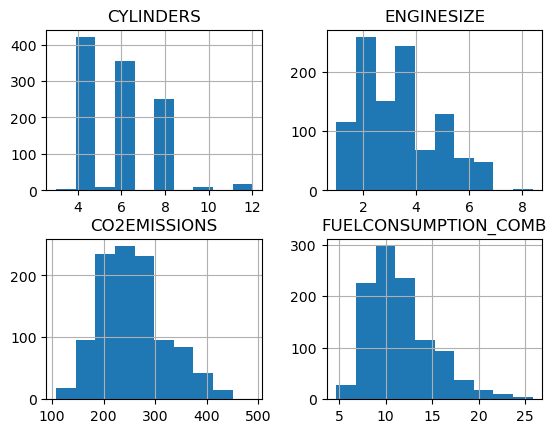

In [7]:
# Plot each feature
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

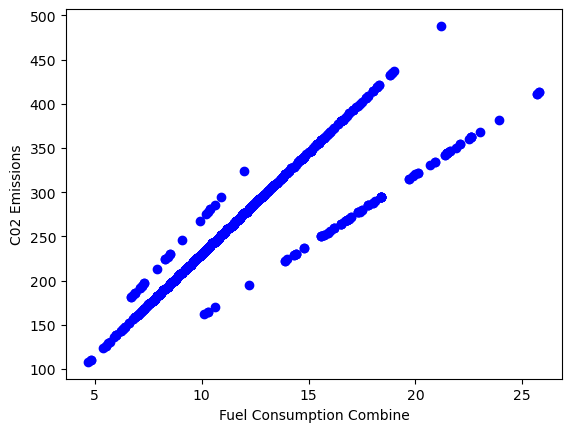

In [8]:
# PLot these features vs Emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption Combine')
plt.ylabel('C02 Emissions')
plt.show()

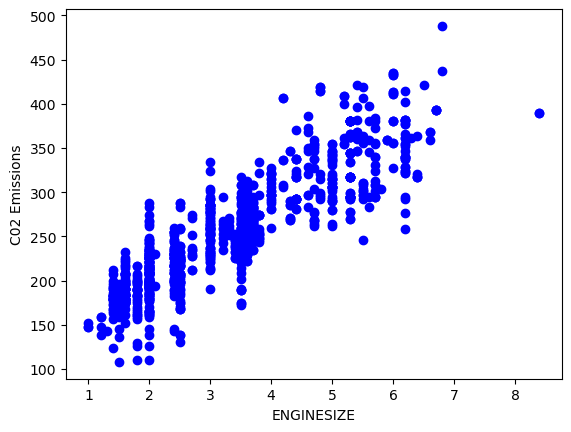

In [9]:
# PLot these features vs Emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('C02 Emissions')
plt.show()

### Create train and test dataset
Create two sets that are mutually exclusive. After which you will train your engine with the train set, and test it with the test set

In [10]:
# Split data
msk = np.random.rand(len(df)) < 0.8 # select 80% of data
train = cdf[msk]    # 80%
test = cdf[~msk]    # 20%

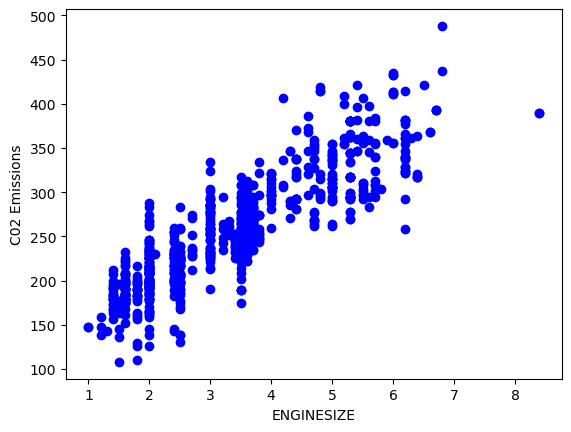

In [11]:
# See the train data distribution
# PLot these features vs Emissions
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('C02 Emissions')
plt.show()


In [12]:
# Model your Linear Regression on your train set
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['ENGINESIZE']])  # 2D array
train_y = np.asarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y) # fit the model
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}') 

Coefficient: [[39.05498129]]
Intercept: [125.97125491]


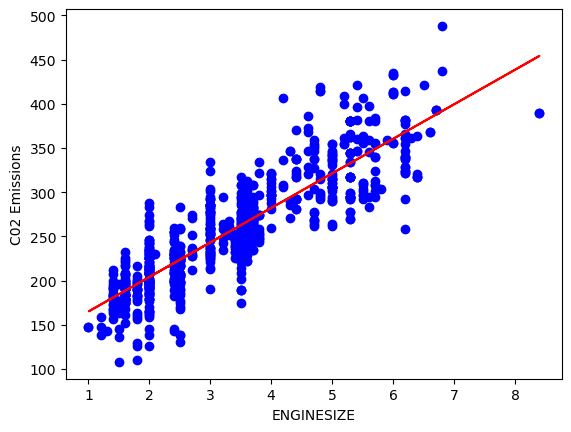

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('C02 Emissions')
# coef_ is 2D, intercept is 1D
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

In [14]:
# Do the evaluation:
# Mean Absolute Error, Residual Square Error, R-Square
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print(f'Mean Absolute Error: {np.mean(np.absolute(test_y_ - test_y))}')
print(f'MSE: {np.mean(test_y_ - test_y)**2}')
print(f'R2-Score: {r2_score(test_y, test_y_)}')

Mean Absolute Error: 23.46796623594756
MSE: 4.474577480628522
R2-Score: 0.7549709903139984


### TASK: Repeat the process using FUELCONSUMPTION_COMB and CO2EMISSIONS

## MUltiple Regression Model

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print(f'Coefficients: {regr.coef_} ')

Coefficients: [[11.22447826  7.34679515  9.50662029]] 


In [16]:
# Get your prediction
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print(f'MSE: {np.mean((y_hat - y)**2)}')
print(f'Variance Score {regr.score(x, y)}')

MSE: 591.0084203670644
Variance Score 0.8546950777323941


/Users/leighkomperda/miniconda3/envs/module_8/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### TASK: Try Multiple Linear Regression using: FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead FUELCONSUMPTION_COMB

Does it result in better accuracy?

## Polynomial Regression

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

df = pd.read_csv('../data/FuelConsumptionCo2.csv')

# Split data
msk = np.random.rand(len(df)) < 0.8 # select 80% of data
train = cdf[msk]    # 80%
test = cdf[~msk]    # 20%

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [19]:
# Create your linear model
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)
# Coefficients
print(f'Coefficients: {clf.coef_}')
print(f'Intercept: {clf.intercept_}')



Coefficients: [[ 0.         53.2771431  -1.88428686]]
Intercept: [103.34077982]


Text(0, 0.5, 'C02 Emissions')

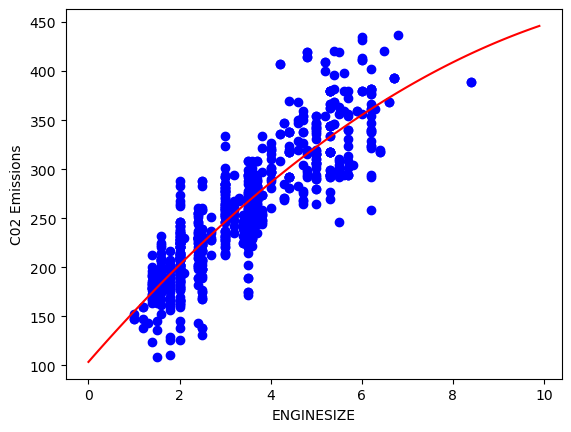

In [20]:
#plot it
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy,'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('C02 Emissions')